# EDA  Game Progress
## Jo Wilder and the Capitol Case

### Columns
* <b>session_id</b> - the ID of the session the event took place in <br>
* <b>index - the index of the event for the session<br>
* <b>elapsed_time</b> - how much time has passed (in milliseconds) between the start of the session and when the event was recorded<br>
* <b>event_name</b> - the name of the event type<br>
* <b>name</b> - the event name (e.g. identifies whether a notebook_click is is opening or closing the notebook)<br>
* <b>level</b> - what level of the game the event occurred in (0 to 22)<br>
* <b>page</b> - the page number of the event (only for notebook-related events)<br>
* <b>room_coor_x</b> - the coordinates of the click in reference to the in-game room (only for click events)<br>
* <b>room_coor_y</b> - the coordinates of the click in reference to the in-game room (only for click events)<br>
* <b>screen_coor_x</b> - the coordinates of the click in reference to the player’s screen (only for click events)<br>
* <b>screen_coor_y</b> - the coordinates of the click in reference to the player’s screen (only for click events)<br>
* <b>hover_duration</b> - how long (in milliseconds) the hover happened for (only for hover events)<br>
* <b>text</b> - the text the player sees during this event<br>
* <b>fqid</b> - the fully qualified ID of the event<br>
* <b>room_fqid</b> - the fully qualified ID of the room the event took place in<br>
* <b>text_fqid</b> - the fully qualified ID of the<br>
* <b>fullscreen</b> - whether the player is in fullscreen mode<br>
* <b>hq</b> - whether the game is in high-quality<br>
* <b>music</b> - whether the game music is on or off<br>
* <b>level_group</b> - which group of levels - and group of questions</b> - this row belongs to (0-4, 5-12, 13-22)<br>

###### Import data
The training file is really large so we break the load up into chunks so we don't have memory loss issues/errors. 

In [1]:
import pandas as pd
import csv
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
def create_chunks_by_file(file_name, group_by_column, chunks = 10):
    
    df_pull = pd.read_csv(file_name, usecols = [group_by_column])
    df_pull = df_pull.groupby(group_by_column)[group_by_column].agg('count')
    
    chunk_size = int(np.ceil(len(df_pull)/chunks))
    
    chunk_values = []
    skip_values = [0]
    for i in range(chunks):
        start_row = i * chunk_size
        end_row = (i + 1) * chunk_size
        if end_row > len(df_pull): 
            end_row = len(df_pull)
        chunk = df_pull.iloc[start_row:end_row].sum()
        chunk_values.append(chunk)
        skip_values.append(skip_values[-1] + chunk)
    return chunk_values, skip_values

chunk_values, skip_values = create_chunks_by_file('train.csv', 'session_id')

In [3]:
%%time
def load_data_in_chunks(file_name, chunk_values, skip_values): 
    dfs_list = []
    iteration = len(chunk_values)
    for i in range(len(chunk_values)):
        print(i, ', ', end = '')
        skiprows = 0
        if i > 0: 
            skiprows = range(1,skip_values[i] + 1)
        train_chunk = pd.read_csv('train.csv', nrows = chunk_values[i],
                           skiprows = skiprows)
        dfs_list.append(train_chunk)

    df = pd.concat(dfs_list, axis = 0)
    return df

df = load_data_in_chunks('train.csv', chunk_values, skip_values)

0 , 1 , 2 , 3 , 4 , 5 , 6 , 7 , 8 , 9 , Wall time: 2min 27s


In [4]:
df.head()

,session_id,index,elapsed_time,event_name,name,level,page,room_coor_x,room_coor_y,screen_coor_x,screen_coor_y,hover_duration,text,fqid,room_fqid,text_fqid,fullscreen,hq,music,level_group
0,20090312431273200,0,0,cutscene_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,undefined,intro,tunic.historicalsociety.closet,tunic.historicalsociety.closet.intro,0,0,1,0-4
1,20090312431273200,1,1323,person_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,"Whatcha doing over there, Jo?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4
2,20090312431273200,2,831,person_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,Just talking to Teddy.,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4
3,20090312431273200,3,1147,person_click,basic,0,NaN,-413.991405,-159.314686,380.0,494.0,NaN,I gotta run to my meeting!,gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4
4,20090312431273200,4,1863,person_click,basic,0,NaN,-412.991405,-159.314686,381.0,494.0,NaN,"Can I come, Gramps?",gramps,tunic.historicalsociety.closet,tunic.historicalsociety.closet.gramps.intro_0_...,0,0,1,0-4


In [5]:
df_labels = pd.read_csv('train_labels.csv')
df_labels.head()

,session_id,correct
0,20090312431273200_q1,1
1,20090312433251036_q1,0
2,20090312455206810_q1,1
3,20090313091715820_q1,0
4,20090313571836404_q1,1


In [7]:
df_labels["session_id"], df_labels['question'] = df_labels['session_id'].str.split('_',1).str
df_labels['question'] = df_labels['question'].str.replace('q', '')
df_labels.head()

,session_id,correct,question
0,20090312431273200,1,1
1,20090312433251036,0,1
2,20090312455206810,1,1
3,20090313091715820,0,1
4,20090313571836404,1,1


In [8]:
missing_values = df.isna().sum()/len(df) *100
missing_values.sort_values(inplace = True)
missing_values = missing_values.to_frame()
missing_values.columns = ['percent']
missing_values.index.names = ['column_name']
missing_values['column_name'] = missing_values.index


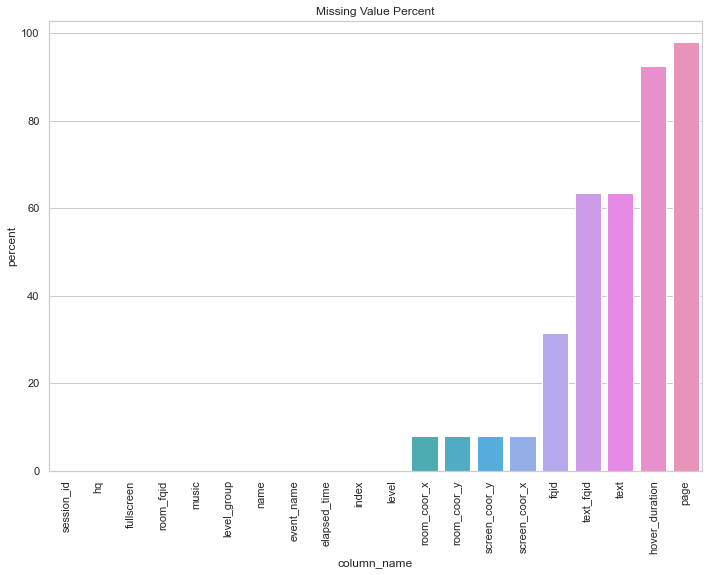

In [9]:
sns.set(rc={'figure.figsize':(11.7,8.27)})

sns.set(style="whitegrid", color_codes=True)
sns.barplot(x = 'column_name'
                 , y = 'percent'
                 ,data=missing_values
                 ).set(title = 'Missing Value Percent')

plt.xticks(rotation = 90)
plt.show()

### Session ID
Counts for some of the session ID's are much higher than others, need to check for duplication.

In [10]:
session_id_data = pd.DataFrame(df['session_id'].unique(), columns = ['session_id'])
session_id_data

,session_id
0,20090312431273200
1,20090312433251036
2,20090312455206810
3,20090313091715820
4,20090313571836404
...,...
23557,22100215342220508
23558,22100215460321130
23559,22100217104993650
23560,22100219442786200


In [11]:
df['session_id'].value_counts()

20110310463989760    19032
20110515090304556     6000
21110313432157404     5435
21010312074134348     4803
20110219555923044     4743
                     ...  
21090109332150240      639
21000013055772070      637
21030108504475890      635
20110112402567744      634
22000610592348800      591
Name: session_id, Length: 23562, dtype: int64

### Index
Checking for duplicates in the data by index. It looks like there is some duplication of indexes.

In [12]:
duplicated_index = df[df.duplicated(subset = ['session_id', 'index'])][['session_id','index']]
duplicated_index['session_id'].unique()

array([20110422113670820, 20110507081078290, 20110507133502024,
       20110507320323120, 20110507352371384, 20110508020139344,
       20110508120428616, 20110508173881216, 20110508215725750,
       20110508244084364, 20110508270709264, 20110508324724896,
       20110508383844444, 20110508425704692, 20110508462583196,
       20110508471567410, 20110508564764664, 20110508572059892,
       20110508575326724, 20110508595387430, 20110509114240204,
       20110509213161468, 20110509255939624, 20110509263033420,
       20110509284588100, 20110509325377130, 20110509334671630,
       20110509345359760, 20110509355433560, 20110509365794830,
       20110509394823010, 20110509421039348, 20110509445651068,
       20110509455264696, 20110509465933030, 20110509501911220,
       20110509524426308, 20110509564003068, 20110509595360024,
       20110510032147028, 20110510135262560, 20110510145882920,
       20110510172903240, 20110510221673496, 20110510293942824,
       20110510332833188, 20110510350351

Looks like the index reset, notice how the elapsed_time continues to increment. We might be okay to ignore this columns if elapsed time doesn't have issues. 

In [13]:
df[(df['session_id'] == 20110422113670820) & (df['index'] == 0)]

,session_id,index,elapsed_time,event_name,name,level,page,room_coor_x,room_coor_y,screen_coor_x,screen_coor_y,hover_duration,text,fqid,room_fqid,text_fqid,fullscreen,hq,music,level_group
471869,20110422113670820,0,0,cutscene_click,basic,0,NaN,-690.991405,87.685314,103.0,247.0,NaN,undefined,intro,tunic.historicalsociety.closet,tunic.historicalsociety.closet.intro,0,0,1,0-4
472967,20110422113670820,0,981574,navigate_click,undefined,18,NaN,620.665103,115.137848,766.0,250.0,NaN,NaN,tobasement,tunic.historicalsociety.entry,NaN,0,0,1,13-22


It looks like there are about 142 of the session id's where the index resets or drops down

In [14]:
session_id_data['hasDuplicateIndex'] = session_id_data.isin(duplicated_index['session_id'].unique()).any(1).astype(int)
session_id_data['hasDuplicateIndex'].value_counts()

0    23420
1      142
Name: hasDuplicateIndex, dtype: int64

### Elapsed Time

We need to check the elapsed time to make sure that it is performing as expected. 

In [15]:
df_add_index = df.reset_index()

In [16]:
df['elapsed_time_diff'] = df['elapsed_time'].diff()
df['previous_elapsed_time'] = df['elapsed_time'].shift()
df['level_diff'] = df['level'].diff()
df['previous_level'] = df['level'].shift()
df['previous_event_name'] = df['event_name'].shift()
df['previous_session_id'] = df['session_id'].shift()

Checking to see if the elapsed time is going backwards from one row to the next, and it looks like it is.

In [17]:
negative_time = df[(df['elapsed_time_diff'] < 0) & (df['session_id'] == df['previous_session_id'])][['session_id', 'event_name','elapsed_time','previous_elapsed_time','index', 'level', 'elapsed_time_diff']]

In [18]:
negative_time.sort_values(by = 'elapsed_time_diff')

,session_id,event_name,elapsed_time,previous_elapsed_time,index,level,elapsed_time_diff
1210919,21030417085341900,person_click,0,18000226.0,700,11,-18000226.0
1320827,22070218331443436,navigate_click,0,3595484.0,970,17,-3595484.0
496782,21070111080982292,map_hover,1017131,1432384.0,655,12,-415253.0
1030805,22060216535738000,navigate_click,83064459,83173326.0,934,18,-108867.0
1543695,21000214474629270,navigate_click,0,68127.0,73,1,-68127.0
...,...,...,...,...,...,...,...
2119431,21050416565697216,navigate_click,1359934,1359935.0,1034,21,-1.0
1378752,21030510190976640,map_click,992635,992636.0,846,20,-1.0
926609,21100314212500268,navigate_click,192977,192978.0,217,6,-1.0
602597,21010109075208944,cutscene_click,57013,57014.0,55,1,-1.0


This seems a little odd that the time resets on the person. 

In [19]:
df[(df['session_id'] == 21030417085341900) & (df['index'] >= 690) & (df['index'] <= 710)]

,session_id,index,elapsed_time,event_name,name,level,page,room_coor_x,room_coor_y,screen_coor_x,...,fullscreen,hq,music,level_group,elapsed_time_diff,previous_elapsed_time,level_diff,previous_level,previous_event_name,previous_session_id
1210909,21030417085341900,690,17979542,person_click,basic,11,NaN,245.650974,-70.00000,654.0,...,0,1,1,5-12,2742.0,17976800.0,0.0,11.0,person_click,2.103042e+16
1210910,21030417085341900,691,17979936,person_click,basic,11,NaN,191.651447,-73.00000,600.0,...,0,1,1,5-12,394.0,17979542.0,0.0,11.0,person_click,2.103042e+16
1210911,21030417085341900,692,17982373,person_click,basic,11,NaN,195.651498,-73.00000,604.0,...,0,1,1,5-12,2437.0,17979936.0,0.0,11.0,person_click,2.103042e+16
1210912,21030417085341900,693,17985260,person_click,basic,11,NaN,200.651499,-96.00000,609.0,...,0,1,1,5-12,2887.0,17982373.0,0.0,11.0,person_click,2.103042e+16
1210913,21030417085341900,694,17987929,person_click,basic,11,NaN,220.651499,-113.00000,629.0,...,0,1,1,5-12,2669.0,17985260.0,0.0,11.0,person_click,2.103042e+16
1210914,21030417085341900,695,17989013,person_click,basic,11,NaN,204.651499,-124.00000,613.0,...,0,1,1,5-12,1084.0,17987929.0,0.0,11.0,person_click,2.103042e+16
1210915,21030417085341900,696,17991716,person_click,basic,11,NaN,218.651499,-119.00000,627.0,...,0,1,1,5-12,2703.0,17989013.0,0.0,11.0,person_click,2.103042e+16
1210916,21030417085341900,697,17993786,person_click,basic,11,NaN,216.651499,-116.00000,625.0,...,0,1,1,5-12,2070.0,17991716.0,0.0,11.0,person_click,2.103042e+16
1210917,21030417085341900,698,17998092,person_click,basic,11,NaN,199.651499,-110.00000,608.0,...,0,1,1,5-12,4306.0,17993786.0,0.0,11.0,person_click,2.103042e+16
1210918,21030417085341900,699,18000226,person_click,basic,11,NaN,196.651499,-106.00000,605.0,...,0,1,1,5-12,2134.0,17998092.0,0.0,11.0,person_click,2.103042e+16


Checking some data to see if there is anything that stands out as bad.

In [20]:
df[(df['session_id'] == 22100221145014656) & (df['index'] >= 1390) & (df['index'] <= 1430)]

,session_id,index,elapsed_time,event_name,name,level,page,room_coor_x,room_coor_y,screen_coor_x,...,fullscreen,hq,music,level_group,elapsed_time_diff,previous_elapsed_time,level_diff,previous_level,previous_event_name,previous_session_id
2591676,22100221145014656,1390,5158999,navigate_click,undefined,20,NaN,377.729418,-227.697322,726.0,...,0,0,1,13-22,687.0,5158312.0,0.0,20.0,navigate_click,2.210022e+16
2591677,22100221145014656,1391,5159814,navigate_click,undefined,20,NaN,524.217324,-81.898174,831.0,...,0,0,1,13-22,815.0,5158999.0,0.0,20.0,navigate_click,2.210022e+16
2591678,22100221145014656,1392,5160749,map_hover,basic,20,NaN,NaN,NaN,NaN,...,0,0,1,13-22,935.0,5159814.0,0.0,20.0,navigate_click,2.210022e+16
2591679,22100221145014656,1393,5160900,map_hover,basic,20,NaN,NaN,NaN,NaN,...,0,0,1,13-22,151.0,5160749.0,0.0,20.0,map_hover,2.210022e+16
2591680,22100221145014656,1394,5160983,map_hover,basic,20,NaN,NaN,NaN,NaN,...,0,0,1,13-22,83.0,5160900.0,0.0,20.0,map_hover,2.210022e+16
2591681,22100221145014656,1395,5162383,map_hover,basic,20,NaN,NaN,NaN,NaN,...,0,0,1,13-22,1400.0,5160983.0,0.0,20.0,map_hover,2.210022e+16
2591682,22100221145014656,1396,5163417,map_hover,basic,20,NaN,NaN,NaN,NaN,...,0,0,1,13-22,1034.0,5162383.0,0.0,20.0,map_hover,2.210022e+16
2591683,22100221145014656,1397,5164392,map_hover,basic,20,NaN,NaN,NaN,NaN,...,0,0,1,13-22,975.0,5163417.0,0.0,20.0,map_hover,2.210022e+16
2591684,22100221145014656,1398,5164001,map_click,undefined,20,NaN,60.008191,31.358956,324.0,...,0,0,1,13-22,-391.0,5164392.0,0.0,20.0,map_hover,2.210022e+16
2591685,22100221145014656,1399,5165035,navigate_click,undefined,20,NaN,-348.916962,139.029800,471.0,...,0,0,1,13-22,1034.0,5164001.0,0.0,20.0,map_click,2.210022e+16


In [21]:
df[(df['session_id'] == 22070218331443436) & (df['index'] >= 960) & (df['index'] <= 980)]

,session_id,index,elapsed_time,event_name,name,level,page,room_coor_x,room_coor_y,screen_coor_x,...,fullscreen,hq,music,level_group,elapsed_time_diff,previous_elapsed_time,level_diff,previous_level,previous_event_name,previous_session_id
1320817,22070218331443436,960,3581778,navigate_click,undefined,17,NaN,684.948521,-138.521667,834.0,...,1,1,1,13-22,2053.0,3579725.0,0.0,17.0,navigate_click,2.207022e+16
1320818,22070218331443436,961,3582227,navigate_click,undefined,17,NaN,705.178060,-138.801795,834.0,...,1,1,1,13-22,449.0,3581778.0,0.0,17.0,navigate_click,2.207022e+16
1320819,22070218331443436,962,3589409,map_hover,basic,17,NaN,NaN,NaN,NaN,...,1,1,1,13-22,7182.0,3582227.0,0.0,17.0,navigate_click,2.207022e+16
1320820,22070218331443436,963,3590337,map_hover,basic,17,NaN,NaN,NaN,NaN,...,1,1,1,13-22,928.0,3589409.0,0.0,17.0,map_hover,2.207022e+16
1320821,22070218331443436,964,3591181,map_hover,basic,17,NaN,NaN,NaN,NaN,...,1,1,1,13-22,844.0,3590337.0,0.0,17.0,map_hover,2.207022e+16
1320822,22070218331443436,965,3592371,map_hover,basic,17,NaN,NaN,NaN,NaN,...,1,1,1,13-22,1190.0,3591181.0,0.0,17.0,map_hover,2.207022e+16
1320823,22070218331443436,966,3593046,map_hover,basic,17,NaN,NaN,NaN,NaN,...,1,1,1,13-22,675.0,3592371.0,0.0,17.0,map_hover,2.207022e+16
1320824,22070218331443436,967,3593593,map_hover,basic,17,NaN,NaN,NaN,NaN,...,1,1,1,13-22,547.0,3593046.0,0.0,17.0,map_hover,2.207022e+16
1320825,22070218331443436,968,3595028,map_hover,basic,17,NaN,NaN,NaN,NaN,...,1,1,1,13-22,1435.0,3593593.0,0.0,17.0,map_hover,2.207022e+16
1320826,22070218331443436,969,3595484,map_click,undefined,17,NaN,441.018679,158.473601,547.0,...,1,1,1,13-22,456.0,3595028.0,0.0,17.0,map_hover,2.207022e+16


In [22]:
reset_time_to_zero = len(negative_time[negative_time['elapsed_time'] == 0]['session_id'].unique())
total_sessions_with_lag_time = len(negative_time['session_id'].unique())

print(f'''There are a total of {reset_time_to_zero} sessions that reset the time back down to zero, out of {total_sessions_with_lag_time} sessions that have the elapsed time go backwards a bit.''')

There are a total of 271 sessions that reset the time back down to zero, out of 23537 sessions that have the elapsed time go backwards a bit.


This implies that all sessions have at least one time lag going backwards.

In [23]:
time_goes_back = len(negative_time['session_id'].unique())
print(f'''There are {time_goes_back} sessions where the time goes back.''')

There are 23537 sessions where the time goes back.


In [24]:
pd.cut(negative_time['elapsed_time_diff'], bins = 5).value_counts().rename_axis('time_range').reset_index(name='counts').sort_values(
    by=['counts'])

,time_range,counts
2,"(-14400181.0, -10800136.0]",0
3,"(-10800136.0, -7200091.0]",0
4,"(-7200091.0, -3600046.0]",0
1,"(-18018226.225, -14400181.0]",1
0,"(-3600046.0, -1.0]",654499


Looks like there are some pretty big time gaps based on the the cut above. The box plot below shows that there is a major outlier. 

In [25]:
negative_time_group_by = negative_time.groupby('session_id')['elapsed_time_diff'].agg(['min', 'size'])

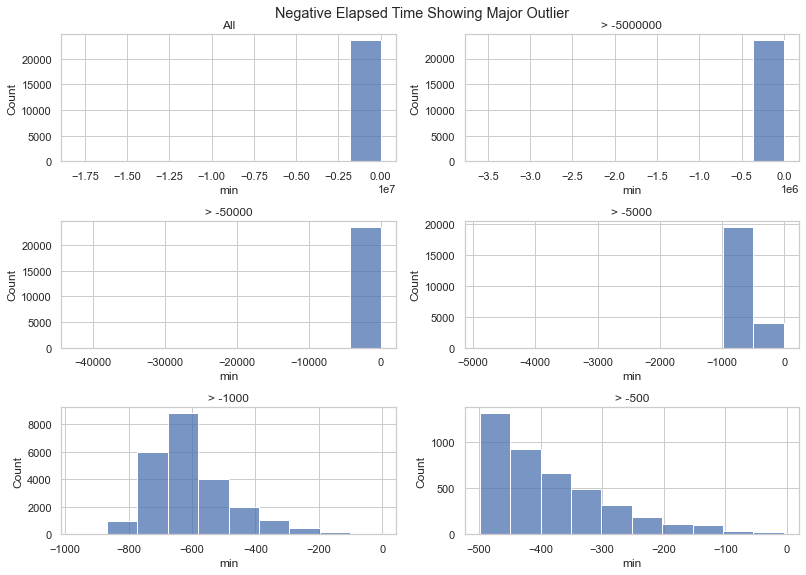

In [26]:
f, axes = plt.subplots(3, 2)
f.tight_layout(pad =3)
    sns.histplot(data = negative_time_group_by, x= "min", bins = 10,ax=axes[0, 0]).set_title("All")
sns.histplot(data = negative_time_group_by[negative_time_group_by['min'] > -5000000]
             , x= "min", bins = 10,ax=axes[0, 1]).set_title("> -5000000")
sns.histplot(data = negative_time_group_by[negative_time_group_by['min'] > -50000]
             , x= "min", bins = 10,ax=axes[1, 0]).set_title("> -50000")
sns.histplot(data = negative_time_group_by[negative_time_group_by['min'] > -5000]
             , x= "min", bins = 10,ax=axes[1 ,1]).set_title("> -5000")
sns.histplot(data = negative_time_group_by[negative_time_group_by['min'] > -1000]
             , x= "min", bins = 10,ax=axes[2, 0]).set_title("> -1000")
sns.histplot(data = negative_time_group_by[negative_time_group_by['min'] > -500]
             , x= "min", bins = 10,ax=axes[2, 1]).set_title("> -500")
f.suptitle('Negative Elapsed Time Showing Major Outlier')
plt.show()

In [27]:
has_significant_negative_elapsed_time = negative_time_group_by[negative_time_group_by['min'] <= -1000].reset_index()['session_id'].unique()
number_greater_than_1000s =len(has_significant_negative_elapsed_time)

In [28]:
print(f'Looks like there are {number_greater_than_1000s} sessions that have a set back time greater than 1000 seconds. Most set back times are between 0 to 1000 seconds.')

Looks like there are 14 sessions that have a set back time greater than 1000 seconds. Most set back times are between 0 to 1000 seconds.


### Level

Looking at the level difference from one row to the previous. There are only 491 rows where the user levels down.  

In [29]:
df[(df['level_diff'] < 0) & (df['index'] > 0) & (df['session_id'] == df['previous_session_id'])][
    ['session_id', 'index','event_name','previous_event_name','elapsed_time','previous_elapsed_time',
     'index', 'level', 'level_group', 'elapsed_time_diff']]

,session_id,index,event_name,previous_event_name,elapsed_time,previous_elapsed_time,index,level,level_group,elapsed_time_diff
95313,20100017310338576,1194,cutscene_click,checkpoint,2894286,2.526620e+06,1194,0,0-4,367666.0
191432,20100110332615344,1851,cutscene_click,checkpoint,6035060,5.627415e+06,1851,0,0-4,407645.0
243494,20100112152091080,1352,cutscene_click,checkpoint,3059921,2.610549e+06,1352,0,0-4,449372.0
266748,20100113211402190,1034,cutscene_click,checkpoint,2778183,2.165430e+06,1034,0,0-4,612753.0
277197,20100113403690710,1162,cutscene_click,checkpoint,1850992,1.361264e+06,1162,0,0-4,489728.0
...,...,...,...,...,...,...,...,...,...,...
2254051,22090216055554660,1035,cutscene_click,checkpoint,3263990,2.785678e+06,1035,0,0-4,478312.0
2312851,22090314145897064,1492,notebook_click,checkpoint,67893141,6.706949e+07,1492,21,13-22,823647.0
2347497,22090409201202380,757,cutscene_click,checkpoint,2219460,1.880634e+06,757,0,0-4,338826.0
2455405,22090510463732496,1816,cutscene_click,checkpoint,1211835840,1.209313e+09,1816,0,0-4,2523326.0


Checking a few sessions to see how they leveled up in their session.

In [30]:
df[(df['session_id'] == 20100017310338576)  & (df['level'] != df['previous_level'])][
    ['session_id', 'index','event_name','previous_event_name','elapsed_time','previous_elapsed_time',
     'level', 'level_group', 'elapsed_time_diff']]

,session_id,index,event_name,previous_event_name,elapsed_time,previous_elapsed_time,level,level_group,elapsed_time_diff
94196,20100017310338576,0,cutscene_click,checkpoint,0,1780823.0,0,0-4,-1780823.0
94224,20100017310338576,28,notebook_click,object_click,44458,42782.0,1,0-4,1676.0
94254,20100017310338576,58,navigate_click,cutscene_click,86928,85444.0,2,0-4,1484.0
94318,20100017310338576,122,navigate_click,person_click,170946,171002.0,3,0-4,-56.0
94367,20100017310338576,171,navigate_click,cutscene_click,228387,227387.0,4,0-4,1000.0
94380,20100017310338576,195,navigate_click,checkpoint,312168,283369.0,5,5-12,28799.0
94391,20100017310338576,206,navigate_click,cutscene_click,332299,331416.0,6,5-12,883.0
94467,20100017310338576,282,navigate_click,person_click,424833,424228.0,7,5-12,605.0
94539,20100017310338576,354,navigate_click,object_click,502709,499692.0,8,5-12,3017.0
94584,20100017310338576,399,navigate_click,object_click,551974,548956.0,9,5-12,3018.0


When a session levels down it seems to happen when the user has reached level 22. 

In [31]:
df[(df['session_id'] == 20100017310338576) & (df['level'] != df['previous_level']) ][
    ['session_id', 'index','event_name','elapsed_time','previous_elapsed_time', 'level', 'elapsed_time_diff']]

,session_id,index,event_name,elapsed_time,previous_elapsed_time,level,elapsed_time_diff
94196,20100017310338576,0,cutscene_click,0,1780823.0,0,-1780823.0
94224,20100017310338576,28,notebook_click,44458,42782.0,1,1676.0
94254,20100017310338576,58,navigate_click,86928,85444.0,2,1484.0
94318,20100017310338576,122,navigate_click,170946,171002.0,3,-56.0
94367,20100017310338576,171,navigate_click,228387,227387.0,4,1000.0
94380,20100017310338576,195,navigate_click,312168,283369.0,5,28799.0
94391,20100017310338576,206,navigate_click,332299,331416.0,6,883.0
94467,20100017310338576,282,navigate_click,424833,424228.0,7,605.0
94539,20100017310338576,354,navigate_click,502709,499692.0,8,3017.0
94584,20100017310338576,399,navigate_click,551974,548956.0,9,3018.0


Checking each level up, to see if it increments more or less than 1. 

In [32]:
df[(df['level_diff'] != 0) & (df['session_id'] == df['previous_session_id'])]['level_diff'].value_counts().sort_index()

-22.0       387
-21.0        12
-20.0         1
-19.0         2
-18.0         7
-17.0         1
-16.0         2
-15.0         1
-14.0         1
-13.0         1
-12.0         1
-11.0         1
-10.0        29
-9.0          3
-8.0          3
-7.0          3
-6.0          2
-5.0          5
-4.0         12
-3.0          7
-2.0          3
-1.0          7
 1.0     519829
 2.0        595
Name: level_diff, dtype: int64

Seeing which level the downgrade starts, and it looks like level 22 is the only one where the session downgrades.

In [33]:
df[(df['level_diff'] < 0) & (df['session_id'] == df['previous_session_id'])].groupby(
    ['previous_level','level','level_diff']).size()

previous_level  level  level_diff
22.0            0      -22.0         387
                1      -21.0          12
                2      -20.0           1
                3      -19.0           2
                4      -18.0           7
                5      -17.0           1
                6      -16.0           2
                7      -15.0           1
                8      -14.0           1
                9      -13.0           1
                10     -12.0           1
                11     -11.0           1
                12     -10.0          29
                13     -9.0            3
                14     -8.0            3
                15     -7.0            3
                16     -6.0            2
                17     -5.0            5
                18     -4.0           12
                19     -3.0            7
                20     -2.0            3
                21     -1.0            7
dtype: int64

Checking when user skips a level.

In [34]:
df[(df['level_diff'] == 2) & (df['session_id'] == df['previous_session_id'])].groupby(['previous_level','level']).size()

previous_level  level
6.0             8          1
14.0            16       570
19.0            21        16
20.0            22         8
dtype: int64

Here is an example when the user levels down to twelve and there is no more movement for the players level. 

In [35]:
df[(df['session_id'] == 20110310292908556) & (df['level'] != df['previous_level']) ][
    ['session_id', 'index','event_name','elapsed_time','previous_elapsed_time', 'level', 'elapsed_time_diff']]

,session_id,index,event_name,elapsed_time,previous_elapsed_time,level,elapsed_time_diff
2405519,20110310292908556,0,cutscene_click,0,1413673.0,0,-1413673.0
2405547,20110310292908556,28,navigate_click,23679,22146.0,1,1533.0
2405573,20110310292908556,54,navigate_click,79421,78505.0,2,916.0
2405617,20110310292908556,98,navigate_click,105635,105051.0,3,584.0
2405655,20110310292908556,136,navigate_click,140497,139764.0,4,733.0
2405674,20110310292908556,171,navigate_click,231835,169150.0,5,62685.0
2405693,20110310292908556,190,navigate_click,251533,251200.0,6,333.0
2405789,20110310292908556,286,navigate_click,354636,353536.0,7,1100.0
2405828,20110310292908556,325,notebook_click,426460,424010.0,8,2450.0
2405867,20110310292908556,364,navigate_click,504400,503017.0,9,1383.0


In [36]:
df_labels[df_labels['session_id'] == '20110310292908556']

,session_id,correct,question
2136,20110310292908556,1,1
25698,20110310292908556,1,2
49260,20110310292908556,1,3
72822,20110310292908556,1,4
96384,20110310292908556,1,5
119946,20110310292908556,0,6
143508,20110310292908556,1,7
167070,20110310292908556,1,8
190632,20110310292908556,1,9
214194,20110310292908556,1,10


Here is an example of a user that levels down, and then levels up a couple of times, goes back up to 22. 

In [37]:
df[(df['session_id'] == 22080510580922628) & (df['level'] != df['previous_level']) ][
    ['session_id', 'index','event_name','elapsed_time','previous_elapsed_time', 'level', 'elapsed_time_diff']]

,session_id,index,event_name,elapsed_time,previous_elapsed_time,level,elapsed_time_diff
1910747,22080510580922628,0,cutscene_click,0,2731271.0,0,-2731271.0
1910772,22080510580922628,25,navigate_click,77222,75620.0,1,1602.0
1910805,22080510580922628,58,navigate_click,161736,160985.0,2,751.0
1910843,22080510580922628,96,navigate_click,253723,251921.0,3,1802.0
1910883,22080510580922628,136,navigate_click,341667,340055.0,4,1612.0
1910903,22080510580922628,165,navigate_click,487195,443691.0,5,43504.0
1910915,22080510580922628,177,navigate_click,520027,518091.0,6,1936.0
1911001,22080510580922628,263,navigate_click,792252,790951.0,7,1301.0
1911119,22080510580922628,381,navigate_click,1004338,1001168.0,8,3170.0
1911141,22080510580922628,403,navigate_click,1066280,1065057.0,9,1223.0


Looks like the session is reporting the results for the questions once, we may need to consider removing some of the level ups. 

In [38]:
df_labels[df_labels['session_id'] == '22080510580922628']

,session_id,correct,question
22941,22080510580922628,1,1
46503,22080510580922628,1,2
70065,22080510580922628,1,3
93627,22080510580922628,1,4
117189,22080510580922628,1,5
140751,22080510580922628,1,6
164313,22080510580922628,0,7
187875,22080510580922628,1,8
211437,22080510580922628,1,9
234999,22080510580922628,1,10


Checking to see what happens when a user hits level 22 and then  levels back up to 22.

In [39]:
df_level_22 = df[(df['level'] != df['previous_level']) & (df['level'] == 22)].groupby('session_id').size().rename_axis('session_id').reset_index(name='counts').sort_values(
    by=['counts'])

In [40]:
df_level_22[df_level_22['counts'] > 1]

,session_id,counts
9536,21030208460267600,2
10693,21030511004821224,2
16910,21100012012311596,2
22093,22060115303115730,2
8766,21020509070940320,2
...,...,...
18844,22000319034806750,2
16452,21090313493696370,2
20891,22030517323812450,2
6071,21010312074134348,3


In [41]:
df[(df['session_id'] == 22030410154791324) & (df['level'] != df['previous_level']) ][
    ['session_id', 'index','event_name','elapsed_time','previous_elapsed_time', 'level', 'elapsed_time_diff']]

,session_id,index,event_name,elapsed_time,previous_elapsed_time,level,elapsed_time_diff
2033367,22030410154791324,0,cutscene_click,0,2998018.0,0,-2998018.0
2033392,22030410154791324,25,navigate_click,32870,31590.0,1,1280.0
2033420,22030410154791324,53,navigate_click,61593,60773.0,2,820.0
2033465,22030410154791324,98,navigate_click,120952,120133.0,3,819.0
2033508,22030410154791324,141,navigate_click,149270,147936.0,4,1334.0
2033527,22030410154791324,172,navigate_click,227734,201835.0,5,25899.0
2033541,22030410154791324,186,navigate_click,249204,247428.0,6,1776.0
2033637,22030410154791324,282,navigate_click,14495945,14495167.0,7,778.0
2033688,22030410154791324,333,navigate_click,14548974,14548550.0,8,424.0
2033721,22030410154791324,366,navigate_click,14603040,14600709.0,9,2331.0


In [42]:
df[(df['session_id'] == 21010312074134348) & (df['level'] != df['previous_level']) ][
    ['session_id', 'index','event_name','elapsed_time','previous_elapsed_time', 'level', 'elapsed_time_diff']]

,session_id,index,event_name,elapsed_time,previous_elapsed_time,level,elapsed_time_diff
1511773,21010312074134348,0,cutscene_click,0,1053383.0,0,-1053383.0
1511799,21010312074134348,26,navigate_click,47875,46740.0,1,1135.0
1511881,21010312074134348,108,navigate_click,199295,196742.0,2,2553.0
1511934,21010312074134348,161,navigate_click,358372,357504.0,3,868.0
1512010,21010312074134348,237,navigate_click,421962,420160.0,4,1802.0
...,...,...,...,...,...,...,...
1516087,21010312074134348,4527,navigate_click,9053791,9053240.0,18,551.0
1516234,21010312074134348,4674,navigate_click,9133813,9133345.0,19,468.0
1516270,21010312074134348,4710,navigate_click,9155716,9155147.0,20,569.0
1516476,21010312074134348,4916,navigate_click,9392991,9392106.0,21,885.0


This session seems to go through the game three times.

In [43]:
df[(df['session_id'] == 21010312074134348) & (df['level'] != df['previous_level'])].groupby('level').size()

level
0     3
1     3
2     3
3     3
4     3
5     3
6     3
7     3
8     3
9     3
10    3
11    3
12    3
13    3
14    3
15    3
16    3
17    3
18    3
19    3
20    3
21    3
22    3
dtype: int64

In [44]:
level_down = df[(df['level_diff'] < 0) & (df['session_id'] == df['previous_session_id'])]['session_id'].unique()

In [45]:
session_id_data['hasLevelDown'] = session_id_data.isin(level_down).any(1).astype(int)
session_id_data['hasLevelDown'].value_counts()

0    23076
1      486
Name: hasLevelDown, dtype: int64

### Event Name

In [46]:
df_event_level = df.groupby(['event_name', 'level_group']).size().rename_axis(
    ['event_name', 'level_group']).reset_index(name='counts')
df_event_level.pivot(index = 'event_name', columns = 'level_group', values = 'counts')[['0-4', '5-12', '13-22']]

level_group,0-4,5-12,13-22
event_name,,,
checkpoint,23713,23682,23633
cutscene_click,787584,292379,1623072
map_click,54068,205314,257860
map_hover,45130,323170,576859
navigate_click,1807806,3192522,6326105
notebook_click,81733,182143,300668
notification_click,183243,222801,242957
object_click,364862,1120858,712491
object_hover,107127,524264,425694


### Name

In [47]:
df_event_level = df.groupby(['name', 'level_group']).size().rename_axis(
    ['name', 'level_group']).reset_index(name='counts')
df_event_level.pivot(index = 'name', columns = 'level_group', values = 'counts')[['0-4', '5-12', '13-22']]

level_group,0-4,5-12,13-22
name,,,
basic,1862968,4676748,6108753
close,157166,221123,298407
next,510,3414,7683
open,33179,77201,124759
prev,1007,5327,12916
undefined,1926175,3860425,6919185


### Page

In [48]:
df_event_level = df.groupby(['page', 'level_group']).size().rename_axis(
    ['page', 'level_group']).reset_index(name='counts')
df_event_level.pivot(index = 'page', columns = 'level_group', values = 'counts')[['0-4', '5-12', '13-22']]

level_group,0-4,5-12,13-22
page,,,
0.0,65446.0,4667.0,3372.0
1.0,16287.0,80807.0,2806.0
2.0,NaN,45288.0,3195.0
3.0,NaN,51381.0,11184.0
4.0,NaN,NaN,88197.0
5.0,NaN,NaN,101171.0
6.0,NaN,NaN,90743.0


### Text

In [49]:
df['text'].fillna('na').value_counts()

na                                             16679807
undefined                                        355969
\u00f0\u0178\u02dc\u0090                          48805
Hey!                                              47452
I should go to the Capitol and tell Mrs. M!       40463
                                                 ...   
Sorry I'm late.                                       1
He needs our help!                                    1
Now can I tell you what happened to Teddy?            1
I knew you could do it, Jo!                           1
AND he stole Teddy!                                   1
Name: text, Length: 598, dtype: int64

###### Row Counts Per Session

In [50]:
sessionIdDf = df['session_id'].value_counts().rename_axis('session_id').reset_index(name='counts')
sessionIdDf = sessionIdDf.sort_values(by=['counts'])

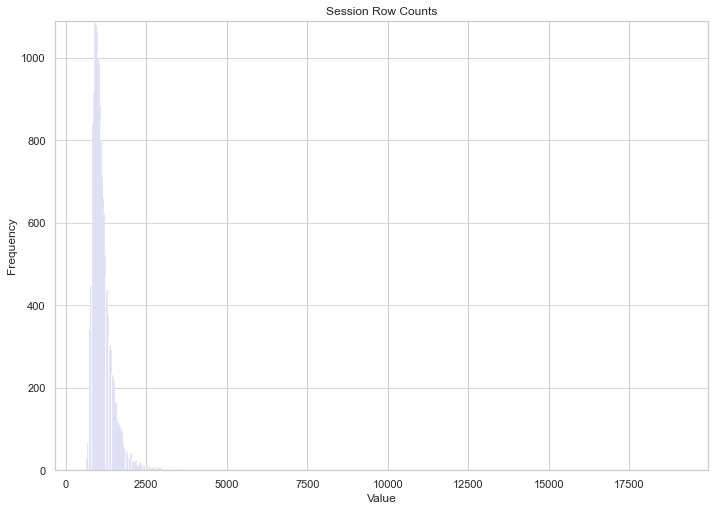

In [51]:
n, bins, patches = plt.hist(x=sessionIdDf['counts'], bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Session Row Counts')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
plt.show()


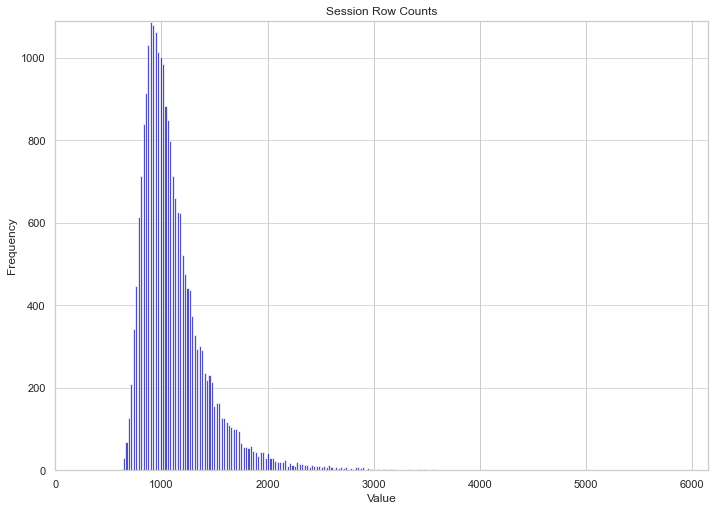

In [52]:
n, bins, patches = plt.hist(x=sessionIdDf['counts'], bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Session Row Counts')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
plt.xlim(0, 6150)
plt.show()


The row counts look like they are almost distributed like a log distribution. Going to look at taking the log for them, after removing anything after 4k rows. 

In [53]:
sessionIdDf['log_counts'] = np.log(sessionIdDf['counts'])

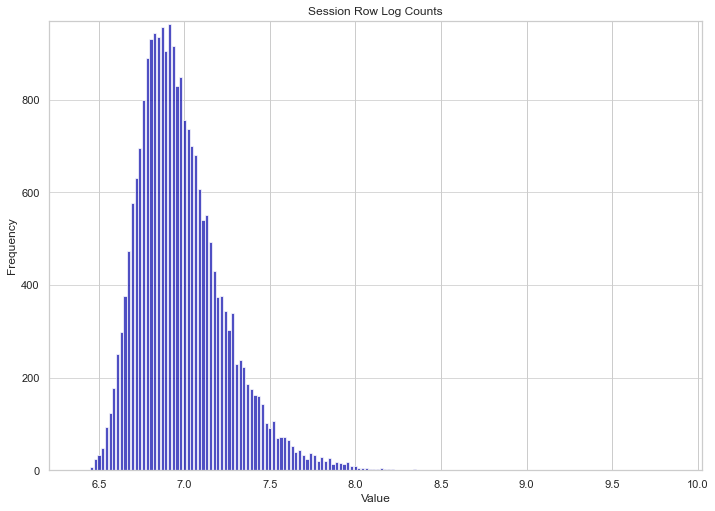

In [54]:
n, bins, patches = plt.hist(x=sessionIdDf['log_counts'], bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Session Row Log Counts')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
plt.show()

###### Room Coordinates X

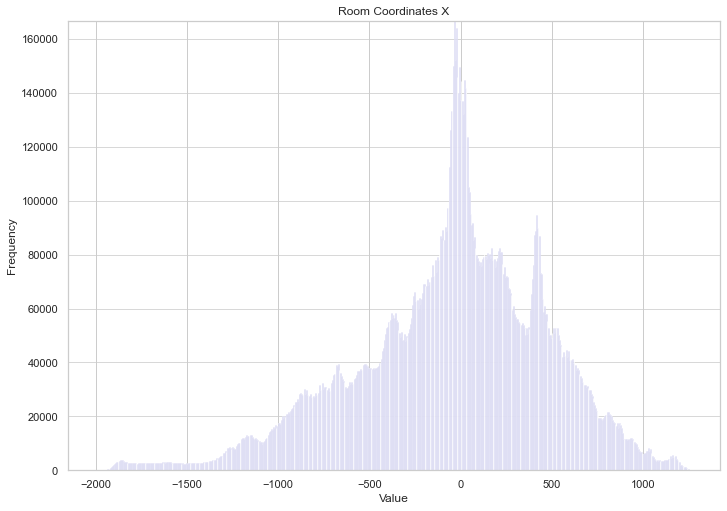

In [55]:
n, bins, patches = plt.hist(x=df['room_coor_x'], bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Room Coordinates X')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
plt.show()

###### Room Coordinates Y

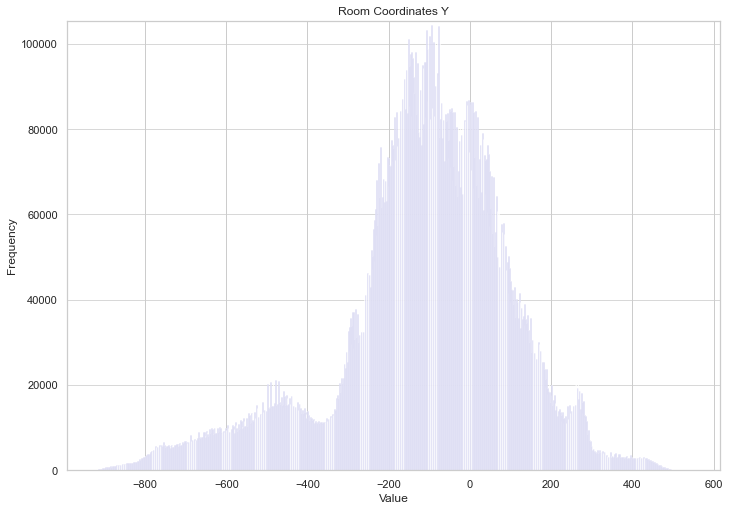

In [56]:
n, bins, patches = plt.hist(x=df['room_coor_y'], bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Room Coordinates Y')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
plt.show()

###### Screen Coordinates X

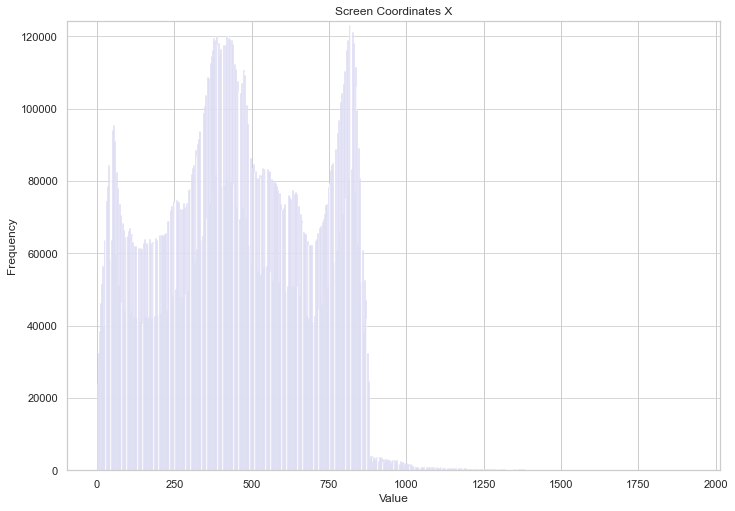

In [57]:
n, bins, patches = plt.hist(x=df['screen_coor_x'], bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Screen Coordinates X')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
plt.show()

###### Screen Coordinates Y

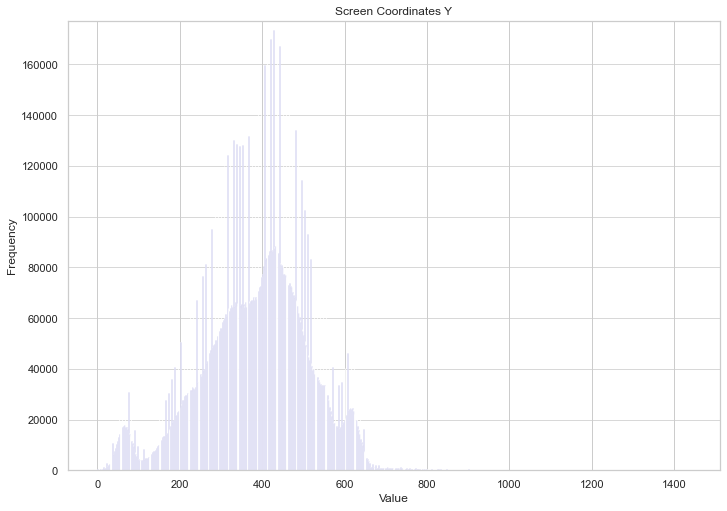

In [58]:
n, bins, patches = plt.hist(x=df['screen_coor_y'], bins='auto', color='#0504aa',
                            alpha=0.7, rwidth=0.85)

plt.grid(axis='y', alpha=0.75)
plt.xlabel('Value')
plt.ylabel('Frequency')
plt.title('Screen Coordinates Y')
maxfreq = n.max()
# Set a clean upper y-axis limit.
plt.ylim(ymax=np.ceil(maxfreq / 10) * 10 if maxfreq % 10 else maxfreq + 10)
plt.show()

In [59]:
corr = df[['session_id', 'index', 'elapsed_time', 'event_name', 'name', 'level',
       'page', 'room_coor_x', 'room_coor_y', 'screen_coor_x', 'screen_coor_y',
       'hover_duration', 'text', 'fqid', 'room_fqid', 'text_fqid',
       'fullscreen', 'hq', 'music', 'level_group']].corr()


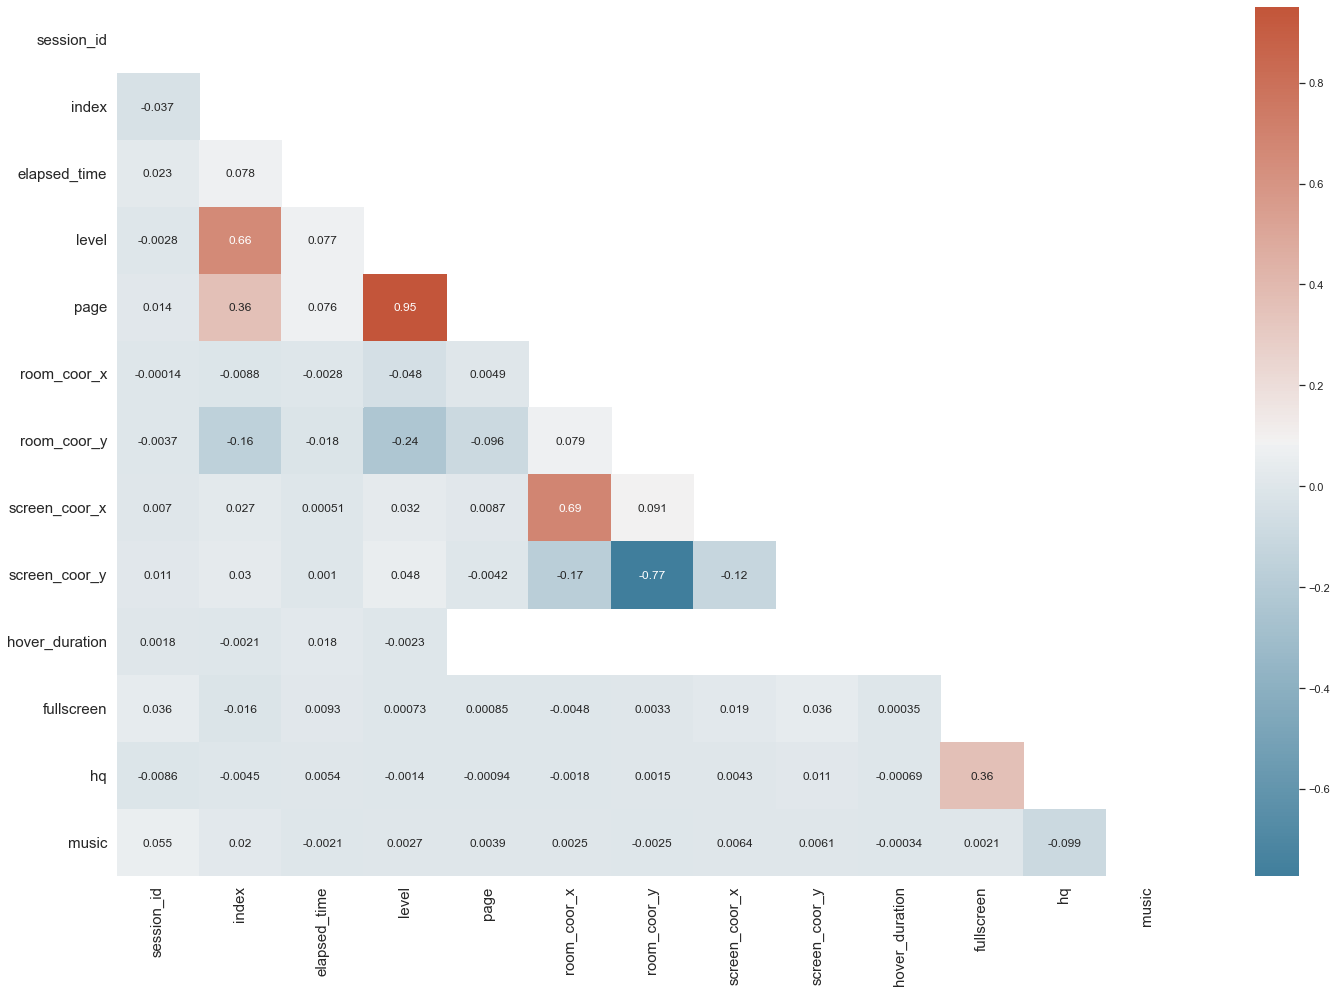

In [60]:
f, ax = plt.subplots(figsize=(24, 16))
cmap = sns.diverging_palette(230, 20, as_cmap=True)
mask = np.triu(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, annot=True, mask = mask,cmap=cmap)
ax.tick_params(axis='x', labelsize=15, rotation =90)
ax.tick_params(axis='y', labelsize=15)